# Binary Classification: Deposit Bank - Marketing

In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [3]:
sys.path.append('../main/')

In [4]:
from sklearn.model_selection import train_test_split
from ModelDSBase import ModelDSBaseWrapper

In [5]:
df = pd.read_csv('../../datasets/deposit_ml.csv')

In [6]:
df_r = pd.read_csv('../../datasets/deposit_ml_reduced.csv')

In [7]:
X = df.drop(labels='y', axis=1).values
y = df['y'].values

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


## SVM Binary Classifier (It takes too much time, although the results are quite good)

In [ ]:
# Reduced dataset
X_r = df_r.drop(labels='y', axis=1).values
y_r = df_r['y'].values

X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X_r, y_r, test_size=0.33, random_state=42)

In [ ]:
from SVMClassificationDSBase import SVMClassificationDSBaseModelParamsToMap
from SVMClassificationDSBase import SVMClassificationDSBaseModel

In [ ]:
params = SVMClassificationDSBaseModelParamsToMap()
svmc = ModelDSBaseWrapper('SVM',X_train_r,y_train_r,X_test_r,y_test_r,[5,10,15],SVMClassificationDSBaseModel, params)

In [ ]:
svmc.train()

In [ ]:
lcsvmc = svmc.getLearningCurves()

In [ ]:
plt.plot(lcsvmc[0,:],'b',lcsvmc[1,:],'r')

In [ ]:
svmc.getScore()

In [ ]:
svmc.save()

In [ ]:
svmc.close()

In [ ]:
recoveredSvmc = SVMClassificationDSBaseModel('SVM2',None,None,None,None,None)

In [ ]:
recoveredSvmc.load()

In [ ]:
recoveredSvmc.predict(X_r[510:515,:])

In [ ]:
y_r[510:515]

In [ ]:
recoveredSvmc.close()

## Random Forest Classificator

In [40]:
from RandomForestClassificationDSBase import RandomForestClassificationDSBaseModel
from RandomForestClassificationDSBase import RandomForestClassificationDSBaseModelParamsToMap

In [41]:
params = RandomForestClassificationDSBaseModelParamsToMap(100,15)
rfc = ModelDSBaseWrapper('RF',X_train,y_train,X_test,y_test,[70,75,80,85,90,95,100],RandomForestClassificationDSBaseModel,params)

X_train size:(30291, 52)
y_train size:(30291,)
X_test size:(14920, 52)
y_test size:(14920,)
initiating model RF0. RandomForestClassification
initiating model RF1. RandomForestClassification
initiating model RF2. RandomForestClassification
initiating model RF3. RandomForestClassification
initiating model RF4. RandomForestClassification
initiating model RF5. RandomForestClassification
initiating model RF6. RandomForestClassification


In [42]:
rfc.train()

training model RF0. RandomForestClassification
training model RF1. RandomForestClassification
training model RF2. RandomForestClassification
training model RF3. RandomForestClassification
training model RF4. RandomForestClassification
training model RF5. RandomForestClassification
training model RF6. RandomForestClassification


In [43]:
lcrfc = rfc.getLearningCurves()

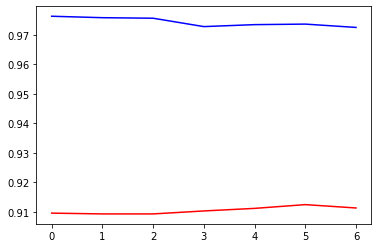

In [44]:
plt.plot(lcrfc[0,:],'b',lcrfc[1,:],'r')

Quite Overfitting!!

In [45]:
rfc.getScore()

0.9113270777479893

In [46]:
rfc.save()

saving model: model_persistance/RandomForestClassification_RF6.sav


In [47]:
rfc.close()

In [48]:
recoveredRfc = RandomForestClassificationDSBaseModel('RF6',None,None,None,None,None)

initiating empty model RF6. RandomForestClassification


In [49]:
recoveredRfc.load()

loading model: model_persistance/RandomForestClassification_RF6.sav


In [50]:
recoveredRfc.predict(X[510:515,:])

predicting model RF6. RandomForestClassification


array([0, 0, 0, 0, 0])

In [51]:
y[510:515]

array([0, 0, 1, 0, 0])

In [52]:
print(classification_report(rfc.model.y_test,rfc.predict(rfc.model.X_test)))

predicting model RF6. RandomForestClassification
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     13175
           1       0.70      0.43      0.53      1745

    accuracy                           0.91     14920
   macro avg       0.81      0.70      0.74     14920
weighted avg       0.90      0.91      0.90     14920



In [53]:
print(confusion_matrix(rfc.model.y_test,rfc.predict(rfc.model.X_test)))

predicting model RF6. RandomForestClassification
[[12850   325]
 [  998   747]]


## Ada Boosting Classificator

In [25]:
from sklearn.preprocessing import MinMaxScaler

# Normalizing
scalerX=MinMaxScaler()
X_s = scalerX.fit_transform(X)
scalery=MinMaxScaler()
y_s = scalery.fit_transform(y.reshape(-1, 1))

X_s_train, X_s_test, y_s_train, y_s_test = train_test_split(X_s, y_s, test_size=0.33, random_state=42)

In [26]:
from AdaBoostClassificationDSBase import AdaBoostClassificationDSBaseModelParamsToMap
from AdaBoostClassificationDSBase import AdaBoostClassificationDSBaseModel

In [27]:
params = AdaBoostClassificationDSBaseModelParamsToMap(100,1.0)
abc = ModelDSBaseWrapper('AB',X_s_train,y_s_train,X_s_test,y_s_test,[70,75,80,85,90,95,100],AdaBoostClassificationDSBaseModel,params)

X_train size:(30291, 52)
y_train size:(30291, 1)
X_test size:(14920, 52)
y_test size:(14920, 1)
initiating model AB0. AdaBoostClassification
initiating model AB1. AdaBoostClassification
initiating model AB2. AdaBoostClassification
initiating model AB3. AdaBoostClassification
initiating model AB4. AdaBoostClassification
initiating model AB5. AdaBoostClassification
initiating model AB6. AdaBoostClassification


In [28]:
abc.train()

training model AB0. AdaBoostClassification


/anaconda3/envs/dsbase/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


training model AB1. AdaBoostClassification


/anaconda3/envs/dsbase/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


training model AB2. AdaBoostClassification


/anaconda3/envs/dsbase/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


training model AB3. AdaBoostClassification


/anaconda3/envs/dsbase/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


training model AB4. AdaBoostClassification


/anaconda3/envs/dsbase/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


training model AB5. AdaBoostClassification


/anaconda3/envs/dsbase/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


training model AB6. AdaBoostClassification


/anaconda3/envs/dsbase/lib/python3.6/site-packages/sklearn/utils/validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [29]:
lcabc = abc.getLearningCurves()

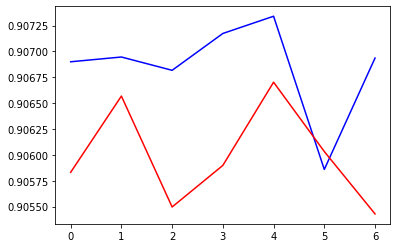

In [30]:
plt.plot(lcabc[0,:],'b',lcabc[1,:],'r')

In [31]:
abc.getScore()

0.9054289544235925

In [32]:
abc.save()

saving model: model_persistance/AdaBoostClassification_AB6.sav


In [33]:
abc.close()

In [34]:
recoveredAbc = AdaBoostClassificationDSBaseModel('AB6',None,None,None,None,None)

initiating empty model AB6. AdaBoostClassification


In [35]:
recoveredAbc.load()

loading model: model_persistance/AdaBoostClassification_AB6.sav


In [36]:
recoveredAbc.predict(X_s[510:515,:])

predicting model AB6. AdaBoostClassification


array([0., 0., 0., 0., 0.])

In [37]:
y[510:515]

array([0, 0, 1, 0, 0])

In [38]:
print(classification_report(abc.model.y_test,abc.predict(abc.model.X_test)))

predicting model AB6. AdaBoostClassification
              precision    recall  f1-score   support

         0.0       0.93      0.97      0.95     13175
         1.0       0.65      0.41      0.50      1745

    accuracy                           0.91     14920
   macro avg       0.79      0.69      0.73     14920
weighted avg       0.89      0.91      0.90     14920



In [39]:
print(confusion_matrix(abc.model.y_test,abc.predict(abc.model.X_test)))

predicting model AB6. AdaBoostClassification
[[12793   382]
 [ 1029   716]]


# XGradient Boosting Classification  

In [9]:
from XGradientBoostingClassificationDSBase import XGradientBoostingClassificationDSBaseModelParamsToMap
from XGradientBoostingClassificationDSBase import XGradientBoostingClassificationDSBaseModel

In [12]:
params = XGradientBoostingClassificationDSBaseModelParamsToMap()
xgbc = ModelDSBaseWrapper('XGBC',X_train,y_train,X_test,y_test,[70,75,80,85,90,95,100],XGradientBoostingClassificationDSBaseModel,params)

X_train size:(30291, 52)
y_train size:(30291,)
X_test size:(14920, 52)
y_test size:(14920,)
initiating model XGBC0. XGradientBoostingClassification
initiating model XGBC1. XGradientBoostingClassification
initiating model XGBC2. XGradientBoostingClassification
initiating model XGBC3. XGradientBoostingClassification
initiating model XGBC4. XGradientBoostingClassification
initiating model XGBC5. XGradientBoostingClassification
initiating model XGBC6. XGradientBoostingClassification


In [13]:
xgbc.train()

training model XGBC0. XGradientBoostingClassification
training model XGBC1. XGradientBoostingClassification
training model XGBC2. XGradientBoostingClassification
training model XGBC3. XGradientBoostingClassification
training model XGBC4. XGradientBoostingClassification
training model XGBC5. XGradientBoostingClassification
training model XGBC6. XGradientBoostingClassification


In [14]:
lcxgbc=xgbc.getLearningCurves()

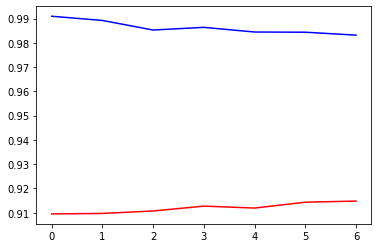

In [15]:
plt.plot(lcxgbc[0,:],'b',lcxgbc[1,:],'r')

In [16]:
xgbc.getScore()

0.9148123324396783

In [17]:
xgbc.save()

saving model: model_persistance/XGradientBoostingClassification_XGBC6.sav


In [18]:
xgbc.close()

In [19]:
recoveredXgbc = XGradientBoostingClassificationDSBaseModel('XGBC6',None,None,None,None,None)

initiating empty model XGBC6. XGradientBoostingClassification


In [20]:
recoveredXgbc.load()

loading model: model_persistance/XGradientBoostingClassification_XGBC6.sav


In [21]:
recoveredXgbc.predict(X[510:515,:])

predicting model XGBC6. XGradientBoostingClassification


array([0, 0, 0, 0, 0])

In [22]:
y[510:515]

array([0, 0, 1, 0, 0])

In [23]:
print(classification_report(xgbc.model.y_test,xgbc.predict(xgbc.model.X_test)))

predicting model XGBC6. XGradientBoostingClassification
              precision    recall  f1-score   support

           0       0.94      0.96      0.95     13175
           1       0.66      0.56      0.61      1745

    accuracy                           0.91     14920
   macro avg       0.80      0.76      0.78     14920
weighted avg       0.91      0.91      0.91     14920



In [24]:
print(confusion_matrix(xgbc.model.y_test,xgbc.predict(xgbc.model.X_test)))

predicting model XGBC6. XGradientBoostingClassification
[[12672   503]
 [  768   977]]


## DNN Classification (Keras)

In [ ]:
from DNNClassificationKerasDSBase import DNNClassificationKerasDSBaseParamsToMap
from DNNClassificationKerasDSBase import DNNClassificationKerasDSBaseModel

In [ ]:
params = DNNClassificationKerasDSBaseParamsToMap(layers=[40,20,10,5], alpha=1e-2, beta1=0.9, beta2=0.999, epsilon=1e-9, batch_size=64, epochs=150)
dnnkc = ModelDSBaseWrapper('DNNKC',X_s_train,y_s_train,X_s_test,y_s_test,[70,75,80,85,90,95,100],DNNClassificationKerasDSBaseModel,params)

In [ ]:
dnnkc.train()

In [ ]:
lcdnnkc=dnnkc.getLearningCurves()

In [ ]:
plt.plot(lcdnnkc[0,:],'b',lcdnnkc[1,:],'r')

In [ ]:
dnnkc.getScore()

In [ ]:
dnnkc.save()

In [ ]:
dnnkc.close()

In [ ]:
recoveredDnnkc = DNNClassificationKerasDSBaseModel('DNNKC6',None,None,None,None,None)

In [ ]:
recoveredDnnkc.load()

In [ ]:
recoveredDnnkc.predict(X_s[510:515,:])

In [ ]:
y_s[510:515]

In [ ]:
print(classification_report(dnnkc.model.y_s_test,dnnkc.predict(dnnkc.model.X_s_test)))

In [ ]:
print(confusion_matrix(dnnkc.model.y_s_test,dnnkc.predict(dnnkc.model.X_s_test)))

# End of Evaluation! 